In [206]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv') #Import raw data
df = df.set_index('name') #Index each observation by the Car Model
df['owner'] = df['owner'].apply(lambda x:0 if x == "First Owner" else 1).astype(int) # 0 means one previous owner (car is on the newer side)
# 1 means two or more previous owner and car is on the older side. This definition seems clear and more simplified
df['fuel'] = df['fuel'].apply(lambda x:'Petrol' if x == 'Petrol' else ('Diesel' if x == 'Diesel' else 'Other'))
#Simplify fuel types into 3 categories. Any fuel type that isn't petrol/diesel make up <10% of the dataset and should be lumped as other instead
df = pd.get_dummies(df, columns = ['fuel','seller_type','transmission']) #Make dummy variables for categorical variables so we can model with the data
df['year'] = 2023 - df['year'] #Transform year column into a variable representing a car's age
df.columns.values[0] = 'Age'
owner = df.pop('owner') #Move owner column to front
df.insert(0,'owner',owner)
ros = RandomOverSampler(random_state = 42) #Balance the dataset
X_os, y_os = ros.fit_resample(df.iloc[:,1:], df.iloc[:,0])
X_os.insert(0,'owner',y_os)
df = X_os
for i in ['Age','selling_price','km_driven']: #Standardize and scale these columns so k-NN will perform better
    print(i + ") mean: " + str(df[i].mean()) + ", std: " + str(df[i].std()))
    df[i] = (df[i]-df[i].mean())/df[i].std()
df

Age) mean: 10.527189265536723, std: 4.366565310455436
selling_price) mean: 463178.29996468924, std: 535345.0704025673
km_driven) mean: 70613.98181497175, std: 46726.0783381431


,owner,Age,selling_price,km_driven,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,0,1.253345,-0.753119,-0.013140,False,False,True,False,True,False,False,True
1,0,1.253345,-0.613022,-0.441167,False,False,True,False,True,False,False,True
2,0,0.108280,0.255577,0.628900,True,False,False,False,True,False,False,True
3,0,-1.036785,-0.398207,-0.526772,False,False,True,False,True,False,False,True
4,1,-0.349746,-0.024616,1.506354,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
5659,1,1.024332,0.068781,1.784571,True,False,False,False,True,False,False,True
5660,1,0.795319,-0.622362,0.628900,True,False,False,False,True,False,False,True
5661,1,0.108280,-0.482267,-0.227153,False,False,True,True,False,False,False,True
5662,1,1.711370,-0.304810,-0.013140,False,False,True,False,True,False,False,True


In [207]:
# check for balance in "owner" column
print((df["owner"] == 0).sum())
print((df["owner"] == 1).sum())

2832
2832


In [208]:
X = df.drop("owner", axis = 1)
y = df["owner"]

print("X:")
display(X.head(5))
print("y:")
display(y.head(5))

X:


,Age,selling_price,km_driven,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,1.253345,-0.753119,-0.013140,False,False,True,False,True,False,False,True
1,1.253345,-0.613022,-0.441167,False,False,True,False,True,False,False,True
2,0.108280,0.255577,0.628900,True,False,False,False,True,False,False,True
3,-1.036785,-0.398207,-0.526772,False,False,True,False,True,False,False,True
4,-0.349746,-0.024616,1.506354,True,False,False,False,True,False,False,True


y:


0    0
1    0
2    0
3    0
4    1
Name: owner, dtype: int32

In [209]:
from sklearn.model_selection import train_test_split

# Splitting data into ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:")
display(X_train.head(5))
print("X_test:")
display(X_test.head(5))
print("y_train:")
display(y_train.head(5))
print("y_train:")
display(y_test.head(5))

X_train:


,Age,selling_price,km_driven,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
4109,-1.036785,-0.379528,-0.869193,False,False,True,True,False,False,False,True
670,-0.120733,0.059441,0.628900,True,False,False,False,True,False,False,True
3493,-0.807772,0.255577,-0.441167,True,False,False,False,True,False,False,True
3527,-0.578759,0.162179,-1.145270,False,False,True,True,False,False,False,True
3551,-1.036785,0.152839,-0.655180,True,False,False,False,True,False,False,True


X_test:


,Age,selling_price,km_driven,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
346,-0.120733,-0.118014,0.628900,False,False,True,False,True,False,False,True
3698,-1.036785,0.059441,-1.404226,False,False,True,False,True,False,False,True
410,-0.578759,1.749940,1.056926,True,False,False,False,True,False,False,True
4220,-1.036785,-0.024616,-0.013140,True,False,False,False,True,False,False,True
3725,-0.578759,0.143499,0.842913,True,False,False,False,True,False,False,True


y_train:


4109    0
670     1
3493    1
3527    1
3551    0
Name: owner, dtype: int32

y_train:


346     0
3698    0
410     0
4220    0
3725    0
Name: owner, dtype: int32

In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "activation" : ["logistic", "tanh", "relu"],
    "max_iter" : [500, 750, 1000],
    "alpha" : [0.025, 0.075, 0.05],
}

mlp = MLPClassifier()

grid = GridSearchCV(estimator = mlp, param_grid = param_grid)

grid.fit(X_train, y_train)

print("Optimal Hyperparameters: ", grid.best_params_)
print("Optimal Accuracy: ", grid.best_score_)

Optimal Hyperparameters:  {'activation': 'relu', 'alpha': 0.025, 'max_iter': 500}
Optimal Accuracy:  0.7614231717497706


In [210]:
from sklearn.neural_network import MLPClassifier

mlp_best = MLPClassifier(activation='relu', solver='adam', batch_size='auto', alpha = 0.025, hidden_layer_sizes = (100,), max_iter = 500)

mlp_best.fit(X_train, y_train)

MLPClassifier(alpha=0.025, max_iter=500)

In [211]:
from sklearn.metrics import accuracy_score

y_pred = mlp_best.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.78


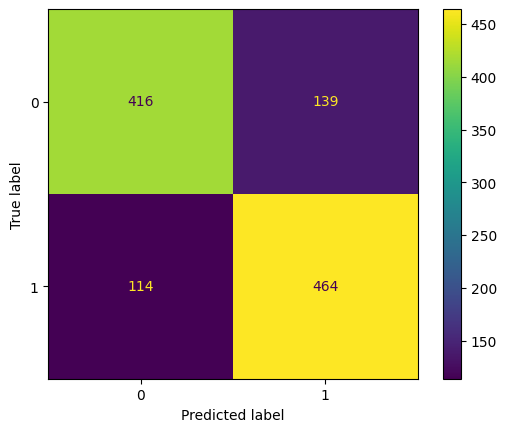

In [212]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels = mlp_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=mlp_best.classes_)
disp.plot()
plt.show()

In [213]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, zero_division = 0))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       555
           1       0.77      0.80      0.79       578

    accuracy                           0.78      1133
   macro avg       0.78      0.78      0.78      1133
weighted avg       0.78      0.78      0.78      1133



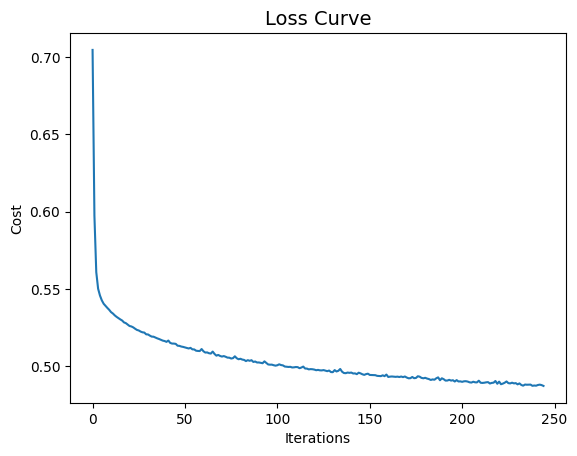

In [214]:
plt.plot(mlp_best.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [215]:
import pickle
pickle.dump(mlp_best, open("models/Classification_MLP.pkl", "wb"))